### CLASSIFICADOR COM TENSOR FLOW

Implementar um classificador utilizando a biblioteca do TensorFlow para o database Iris Setosa.

In [1]:
#Instalando o Tensor Flow
#!pip install tensorflow==2.6.2

In [2]:
#Versaão do Keras
!pip list | grep keras

keras                   2.6.0


In [3]:
#Versão do TensorFlow
!pip list | grep tensorflow

tensorflow              2.6.2
tensorflow-estimator    2.6.0


### Importação das bibliotecas

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# Bibliotecas do SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Bibliotecas do Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

### Preprocessamento

In [33]:
#Carregando a base de dados
df_iris = pd.read_csv("./iris.csv")

In [34]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
#Estatísticas gerais sobre a base de dados
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
#Informaçãoes sobre as features
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visulalização de dados

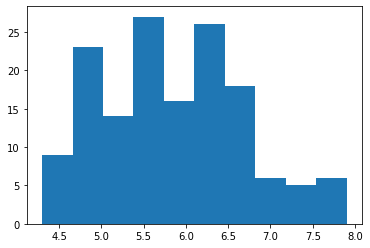

In [37]:
#Observando algumas distribuições
plt.hist(x = df_iris['sepal_length']);

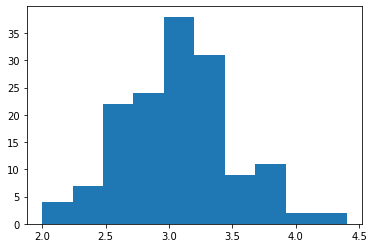

In [38]:
plt.hist(x = df_iris['sepal_width']);

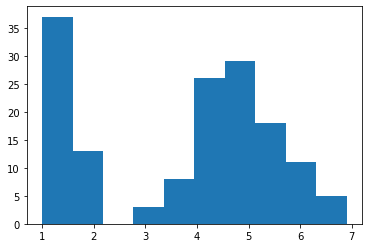

In [39]:
plt.hist(x = df_iris['petal_length']);

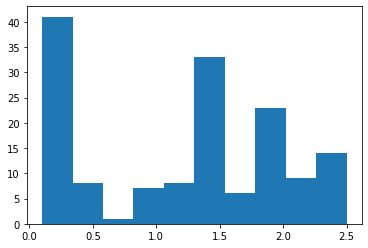

In [40]:
plt.hist(x = df_iris['petal_width']);


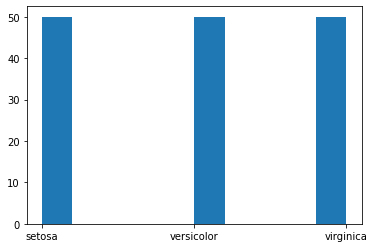

In [41]:
plt.hist(x = df_iris['species']);

### Tratamento de valores inconsistentes

In [42]:
# Verificando o total registros com valores nulos
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
# Verificando valores inconsistentes
nomes_colunas = list(df_iris.columns)  #Lista com os nomes dos atributos

# Negativos
for i in nomes_colunas:
    if (i != "species"):
        print("Atributo: " + i)
        print(df_iris.loc[df_iris[i] < 0])  #Retorna os registros com valores negativos para cada atributo
        print("\n")


Atributo: sepal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: sepal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: petal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: petal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []




### Preparação dos dados para entrada no Modelo

In [44]:
#Divisão entre previsores e classe
X = df_iris.loc[:, df_iris.columns != 'species']
y = df_iris.loc[:, ['species']]

In [45]:
# Transformações de dados
# Label Encoder
y_enc = LabelEncoder().fit_transform(y)  #Categórico para numérico discreto
# Aplicando o one hot enconding diretamente num array numérico 1D
y_label = tf.keras.utils.to_categorical(y_enc)  
print(y_enc)   #Array numérico discreto das classes
y_label        #Saída com o One Hot

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/leandro/Win/DADOS/Tablet/PosGrad_IA_PUC-MG/VENV/linux_venv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [46]:
#Normalização dos dados
from sklearn.preprocessing import *
#scaler = StandardScaler()  #Ajuste com StandardScaler
#X_scaled = scaler.fit_transform(X)  
X_scaled = normalize(X) #Normalizando os dados
X_scaled[1:5:,:]  #Retorna as 4 primriras linhas do array


array([[0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [47]:
#Divisão de base de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
                    X_scaled, y_label, 
                    test_size = 0.25, 
                    random_state = 0
                    )

In [48]:
#Exportando como CSV o databese preprocessado

# Previsores
X_export = pd.DataFrame(X_scaled, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X_export.to_csv("./tensor_iris_preprocessed_input.csv", index=False)

# Classe alvo
y_export = pd.DataFrame(y_enc)
y_export.to_csv("./tensor_iris_preprocessed_target.csv", index=False)


### Criando o Modelo com o Tensor Flow

In [61]:
#Definição do modelo
model = Sequential([
        keras.layers.Input(shape=X_treinamento.shape[1:]),  #Definição da camada de entrada, nesse caso são 4 atributos
        keras.layers.Dense(4, activation='relu'),    #Número de neurônios da primeira camada oculta e função de ativação
        keras.layers.Dense(4, activation='relu'),    #Adicionando uma segunda camada oculta
        keras.layers.Dropout(0.2),  #O dropout ajuda a previnir overfiting, a taxa varia entre 0 a 1 com valores usuais pequenos
        keras.layers.Dense(3, activation='softmax')  #Camada de saída com 3 classes alvo e ativação softmax
    ])

In [62]:
# Dimensão da camada de entrada, retorna o shape do primeiro registro de variáveis de entrada
X_treinamento.shape[1:]

(4,)

In [63]:
#Resumo do modelo criado
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Compilando o modelo
from tensorflow.keras import optimizers

model.compile(
#              optimizer='adam',                                 #Adam para o backpropagation
              optimizer=optimizers.RMSprop(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
              loss=keras.losses.CategoricalCrossentropy(),       #Função de perda
              metrics=['accuracy']                               #Métrica utilizada
             )

In [65]:
#Treinamento do modelo
history = model.fit(X_treinamento, y_treinamento, epochs=1000, validation_data=(X_teste, y_teste), verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 72ms/step - loss: 1.0987 - accuracy: 0.2589 - val_loss: 1.0992 - val_accuracy: 0.2368
Epoch 2/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.0985 - accuracy: 0.3661 - val_loss: 1.0994 - val_accuracy: 0.2368
Epoch 3/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.0984 - accuracy: 0.3661 - val_loss: 1.0996 - val_accuracy: 0.2368
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.0984 - accuracy: 0.3661 - val_loss: 1.0998 - val_accuracy: 0.2368
Epoch 5/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.0983 - accuracy: 0.3661 - val_loss: 1.1001 - val_accuracy: 0.2368
Epoch 6/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.0981 - accuracy: 0.3661 - val_loss: 1.1005 - val_accuracy: 0.2368
Epoch 7/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.0979 - accuracy: 0.3661 - val_loss: 1.1008 - val_accuracy: 0.2368
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0905 - accuracy: 0.3839 - val_loss: 1.1038 - val_accuracy: 0.2368
Epoch 60/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0905 - accuracy: 0.3839 - val_loss: 1.1036 - val_accuracy: 0.2368
Epoch 61/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0898 - accuracy: 0.3750 - val_loss: 1.1034 - val_accuracy: 0.2368
Epoch 62/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0908 - accuracy: 0.4286 - val_loss: 1.1035 - val_accuracy: 0.2368
Epoch 63/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.0889 - accuracy: 0.3929 - val_loss: 1.1032 - val_accuracy: 0.2368
Epoch 64/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0893 - accuracy: 0.4018 - val_loss: 1.1033 - val_accuracy: 0.2368
Epoch 65/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0880 - accuracy: 0.3929 - val_loss: 1.1031 - val_accuracy: 0.2368
Epoch 

4/4 [==============================] - 0s 15ms/step - loss: 1.0629 - accuracy: 0.6250 - val_loss: 1.0805 - val_accuracy: 0.5789
Epoch 117/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0619 - accuracy: 0.6250 - val_loss: 1.0793 - val_accuracy: 0.5789
Epoch 118/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0590 - accuracy: 0.6429 - val_loss: 1.0788 - val_accuracy: 0.5789
Epoch 119/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0568 - accuracy: 0.6518 - val_loss: 1.0780 - val_accuracy: 0.5789
Epoch 120/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0582 - accuracy: 0.6339 - val_loss: 1.0773 - val_accuracy: 0.5789
Epoch 121/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0557 - accuracy: 0.6429 - val_loss: 1.0765 - val_accuracy: 0.5789
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0531 - accuracy: 0.6518 - val_loss: 1.0755 - val_accuracy: 0.5789
Epoch 123/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.9994 - accuracy: 0.6339 - val_loss: 1.0203 - val_accuracy: 0.5789
Epoch 174/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9824 - accuracy: 0.6696 - val_loss: 1.0183 - val_accuracy: 0.5789
Epoch 175/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9979 - accuracy: 0.6250 - val_loss: 1.0168 - val_accuracy: 0.5789
Epoch 176/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0070 - accuracy: 0.6071 - val_loss: 1.0156 - val_accuracy: 0.5789
Epoch 177/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0009 - accuracy: 0.6161 - val_loss: 1.0141 - val_accuracy: 0.5789
Epoch 178/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0012 - accuracy: 0.6161 - val_loss: 1.0131 - val_accuracy: 0.5789
Epoch 179/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9858 - accuracy: 0.6429 - val_loss: 1.0120 - val_accuracy: 0.5789
Epoch 180/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.9070 - accuracy: 0.6429 - val_loss: 0.9267 - val_accuracy: 0.5789
Epoch 231/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.9196 - accuracy: 0.6250 - val_loss: 0.9250 - val_accuracy: 0.5789
Epoch 232/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8891 - accuracy: 0.6607 - val_loss: 0.9225 - val_accuracy: 0.5789
Epoch 233/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9234 - accuracy: 0.6161 - val_loss: 0.9211 - val_accuracy: 0.5789
Epoch 234/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9186 - accuracy: 0.6161 - val_loss: 0.9194 - val_accuracy: 0.5789
Epoch 235/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9331 - accuracy: 0.5982 - val_loss: 0.9176 - val_accuracy: 0.5789
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8921 - accuracy: 0.6518 - val_loss: 0.9154 - val_accuracy: 0.5789
Epoch 237/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.7905 - accuracy: 0.6607 - val_loss: 0.8124 - val_accuracy: 0.5789
Epoch 288/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8089 - accuracy: 0.6429 - val_loss: 0.8104 - val_accuracy: 0.5789
Epoch 289/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8198 - accuracy: 0.6339 - val_loss: 0.8085 - val_accuracy: 0.5789
Epoch 290/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7943 - accuracy: 0.6518 - val_loss: 0.8064 - val_accuracy: 0.5789
Epoch 291/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8680 - accuracy: 0.5893 - val_loss: 0.8053 - val_accuracy: 0.5789
Epoch 292/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8445 - accuracy: 0.6071 - val_loss: 0.8037 - val_accuracy: 0.5789
Epoch 293/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7910 - accuracy: 0.6518 - val_loss: 0.8013 - val_accuracy: 0.5789
Epoch 294/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.7939 - accuracy: 0.6071 - val_loss: 0.7110 - val_accuracy: 0.5789
Epoch 345/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7366 - accuracy: 0.6429 - val_loss: 0.7094 - val_accuracy: 0.5789
Epoch 346/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7503 - accuracy: 0.6339 - val_loss: 0.7075 - val_accuracy: 0.5789
Epoch 347/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7351 - accuracy: 0.6429 - val_loss: 0.7059 - val_accuracy: 0.5789
Epoch 348/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8012 - accuracy: 0.5982 - val_loss: 0.7052 - val_accuracy: 0.5789
Epoch 349/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7312 - accuracy: 0.6429 - val_loss: 0.7029 - val_accuracy: 0.5789
Epoch 350/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7166 - accuracy: 0.6518 - val_loss: 0.7009 - val_accuracy: 0.5789
Epoch 351/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.7089 - accuracy: 0.6339 - val_loss: 0.6372 - val_accuracy: 0.5789
Epoch 402/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7252 - accuracy: 0.6250 - val_loss: 0.6368 - val_accuracy: 0.5789
Epoch 403/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7093 - accuracy: 0.6339 - val_loss: 0.6363 - val_accuracy: 0.5789
Epoch 404/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7072 - accuracy: 0.6339 - val_loss: 0.6352 - val_accuracy: 0.5789
Epoch 405/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7553 - accuracy: 0.6071 - val_loss: 0.6348 - val_accuracy: 0.5789
Epoch 406/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7390 - accuracy: 0.6161 - val_loss: 0.6345 - val_accuracy: 0.5789
Epoch 407/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7061 - accuracy: 0.6339 - val_loss: 0.6333 - val_accuracy: 0.5789
Epoch 408/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.6879 - accuracy: 0.6429 - val_loss: 0.5937 - val_accuracy: 0.5789
Epoch 459/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7055 - accuracy: 0.6518 - val_loss: 0.5932 - val_accuracy: 0.5789
Epoch 460/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6338 - accuracy: 0.6875 - val_loss: 0.5926 - val_accuracy: 0.5789
Epoch 461/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7234 - accuracy: 0.6429 - val_loss: 0.5924 - val_accuracy: 0.5789
Epoch 462/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6508 - accuracy: 0.6786 - val_loss: 0.5915 - val_accuracy: 0.5789
Epoch 463/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7588 - accuracy: 0.6250 - val_loss: 0.5913 - val_accuracy: 0.5789
Epoch 464/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6857 - accuracy: 0.6607 - val_loss: 0.5906 - val_accuracy: 0.5789
Epoch 465/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.6339 - accuracy: 0.7857 - val_loss: 0.5581 - val_accuracy: 0.6842
Epoch 516/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6713 - accuracy: 0.7857 - val_loss: 0.5577 - val_accuracy: 0.6842
Epoch 517/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6285 - accuracy: 0.8571 - val_loss: 0.5581 - val_accuracy: 0.6842
Epoch 518/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6896 - accuracy: 0.7857 - val_loss: 0.5571 - val_accuracy: 0.6842
Epoch 519/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6686 - accuracy: 0.8036 - val_loss: 0.5574 - val_accuracy: 0.6842
Epoch 520/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6308 - accuracy: 0.8036 - val_loss: 0.5563 - val_accuracy: 0.6842
Epoch 521/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7096 - accuracy: 0.7589 - val_loss: 0.5551 - val_accuracy: 0.6842
Epoch 522/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.5812 - accuracy: 0.8750 - val_loss: 0.5180 - val_accuracy: 0.9211
Epoch 573/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.8125 - val_loss: 0.5182 - val_accuracy: 0.9211
Epoch 574/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6910 - accuracy: 0.8036 - val_loss: 0.5195 - val_accuracy: 0.8947
Epoch 575/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6287 - accuracy: 0.8304 - val_loss: 0.5180 - val_accuracy: 0.9211
Epoch 576/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7021 - accuracy: 0.8482 - val_loss: 0.5175 - val_accuracy: 0.9211
Epoch 577/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5760 - accuracy: 0.8929 - val_loss: 0.5149 - val_accuracy: 0.9474
Epoch 578/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6067 - accuracy: 0.8304 - val_loss: 0.5158 - val_accuracy: 0.9211
Epoch 579/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.6722 - accuracy: 0.8036 - val_loss: 0.4831 - val_accuracy: 0.9737
Epoch 630/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5733 - accuracy: 0.8571 - val_loss: 0.4841 - val_accuracy: 0.9737
Epoch 631/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6503 - accuracy: 0.8125 - val_loss: 0.4841 - val_accuracy: 0.9737
Epoch 632/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6172 - accuracy: 0.7857 - val_loss: 0.4822 - val_accuracy: 0.9737
Epoch 633/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6011 - accuracy: 0.8304 - val_loss: 0.4812 - val_accuracy: 0.9737
Epoch 634/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5571 - accuracy: 0.8571 - val_loss: 0.4814 - val_accuracy: 0.9737
Epoch 635/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5722 - accuracy: 0.8571 - val_loss: 0.4789 - val_accuracy: 0.9737
Epoch 636/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.6169 - accuracy: 0.8482 - val_loss: 0.4572 - val_accuracy: 0.9737
Epoch 687/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6308 - accuracy: 0.8125 - val_loss: 0.4557 - val_accuracy: 0.9737
Epoch 688/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6665 - accuracy: 0.7857 - val_loss: 0.4607 - val_accuracy: 0.9737
Epoch 689/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6245 - accuracy: 0.8304 - val_loss: 0.4600 - val_accuracy: 0.9737
Epoch 690/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5881 - accuracy: 0.8214 - val_loss: 0.4537 - val_accuracy: 0.9737
Epoch 691/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7140 - accuracy: 0.8125 - val_loss: 0.4556 - val_accuracy: 0.9737
Epoch 692/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5996 - accuracy: 0.8393 - val_loss: 0.4554 - val_accuracy: 0.9737
Epoch 693/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.6740 - accuracy: 0.7768 - val_loss: 0.4334 - val_accuracy: 0.9737
Epoch 744/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4583 - accuracy: 0.8929 - val_loss: 0.4347 - val_accuracy: 0.9737
Epoch 745/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6104 - accuracy: 0.8304 - val_loss: 0.4299 - val_accuracy: 0.9737
Epoch 746/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6569 - accuracy: 0.8125 - val_loss: 0.4289 - val_accuracy: 0.9737
Epoch 747/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5278 - accuracy: 0.8661 - val_loss: 0.4299 - val_accuracy: 0.9737
Epoch 748/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5843 - accuracy: 0.8393 - val_loss: 0.4276 - val_accuracy: 0.9737
Epoch 749/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5494 - accuracy: 0.8393 - val_loss: 0.4300 - val_accuracy: 0.9737
Epoch 750/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.5118 - accuracy: 0.8393 - val_loss: 0.4071 - val_accuracy: 0.9737
Epoch 801/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6317 - accuracy: 0.8036 - val_loss: 0.4078 - val_accuracy: 0.9737
Epoch 802/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5078 - accuracy: 0.8482 - val_loss: 0.4046 - val_accuracy: 0.9737
Epoch 803/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6101 - accuracy: 0.8214 - val_loss: 0.4022 - val_accuracy: 0.9737
Epoch 804/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5382 - accuracy: 0.8750 - val_loss: 0.4039 - val_accuracy: 0.9737
Epoch 805/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6222 - accuracy: 0.8304 - val_loss: 0.4089 - val_accuracy: 0.9737
Epoch 806/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5207 - accuracy: 0.8571 - val_loss: 0.4097 - val_accuracy: 0.9737
Epoch 807/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.6467 - accuracy: 0.7946 - val_loss: 0.3914 - val_accuracy: 0.9737
Epoch 858/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6051 - accuracy: 0.8036 - val_loss: 0.3894 - val_accuracy: 0.9737
Epoch 859/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5272 - accuracy: 0.8393 - val_loss: 0.3888 - val_accuracy: 0.9737
Epoch 860/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5320 - accuracy: 0.8571 - val_loss: 0.3883 - val_accuracy: 0.9737
Epoch 861/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6647 - accuracy: 0.8036 - val_loss: 0.3852 - val_accuracy: 0.9737
Epoch 862/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5978 - accuracy: 0.8214 - val_loss: 0.3896 - val_accuracy: 0.9737
Epoch 863/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6784 - accuracy: 0.7857 - val_loss: 0.3879 - val_accuracy: 0.9737
Epoch 864/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.5493 - accuracy: 0.8571 - val_loss: 0.3600 - val_accuracy: 0.9737
Epoch 915/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6109 - accuracy: 0.8393 - val_loss: 0.3634 - val_accuracy: 0.9737
Epoch 916/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4875 - accuracy: 0.8304 - val_loss: 0.3605 - val_accuracy: 0.9737
Epoch 917/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5632 - accuracy: 0.8304 - val_loss: 0.3609 - val_accuracy: 0.9737
Epoch 918/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.8125 - val_loss: 0.3667 - val_accuracy: 0.9737
Epoch 919/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6890 - accuracy: 0.7679 - val_loss: 0.3662 - val_accuracy: 0.9737
Epoch 920/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6643 - accuracy: 0.7946 - val_loss: 0.3631 - val_accuracy: 0.9737
Epoch 921/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.5761 - accuracy: 0.8214 - val_loss: 0.3498 - val_accuracy: 0.9737
Epoch 972/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4915 - accuracy: 0.8304 - val_loss: 0.3464 - val_accuracy: 0.9737
Epoch 973/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6264 - accuracy: 0.8214 - val_loss: 0.3461 - val_accuracy: 0.9737
Epoch 974/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4837 - accuracy: 0.8571 - val_loss: 0.3446 - val_accuracy: 0.9737
Epoch 975/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4942 - accuracy: 0.8661 - val_loss: 0.3455 - val_accuracy: 0.9737
Epoch 976/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5164 - accuracy: 0.8571 - val_loss: 0.3480 - val_accuracy: 0.9737
Epoch 977/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5308 - accuracy: 0.8750 - val_loss: 0.3484 - val_accuracy: 0.9737
Epoch 978/1000

### Análise do modelo

In [66]:
#Checando a acurácia
model.evaluate(X_teste, y_teste)

2/2 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.9737


[0.3426418602466583, 0.9736841917037964]

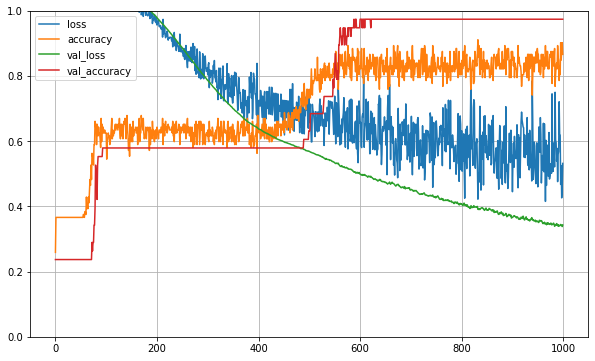

In [67]:
#Evolução de performance
pd.DataFrame(history.history).plot(figsize=(10,6))  #Evolução das métricas
plt.grid(True)            #Mostra as linhas de grade
plt.gca().set_ylim(0, 1)  #Limites do eixo y
plt.show()                #Gera o gráfico

In [68]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(X_teste)                 #Retorna a predição da base de teste
y_prediction = np.argmax (y_prediction, axis = 1)     #Retorna o índice do array com maior valor (classe predita)
y_test=np.argmax(y_teste, axis=1)                     #Classe correta

#Cria a matriz de confusão com as classes preditas nas colunas
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print("\nResultado normalizado:")
print(result)
not_norm_result = confusion_matrix(y_test, y_prediction)
print("\nResultado não normalizado:")
print(not_norm_result)


Resultado normalizado:
[[1.  0.  0. ]
 [0.  1.  0.1]
 [0.  0.  0.9]]

Resultado não normalizado:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [69]:
#Gravando o classificador
from keras.models import load_model

# Para gravar um classificador
model.save('tensorflow_iris_classifier.h5')  #Cria um arquivo HDF5 para salvar o classificador

# Para ler um classificador salvo
model1 = load_model('tensorflow_iris_classifier.h5')

#Comparação entre modelo salvo e já treinado, confirma-se que não há perda.
print(model.evaluate(X_teste, y_teste))
print(model1.evaluate(X_teste, y_teste))

2/2 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.9737
[0.3426418602466583, 0.9736841917037964]
2/2 [==============================] - 0s 11ms/step - loss: 0.3426 - accuracy: 0.9737
[0.3426418602466583, 0.9736841917037964]


### Predição

In [70]:
#Predição de um lote de dados
new_data, y_actual = X_teste[:3], y_teste[:3]
print(new_data.shape)              #Formato da entrada de dados
y_proba = model.predict(new_data)  #Predição
print(f"Actual data : {y_actual}")
print(y_proba)                     #Matriz das probabilidades de predição
for pred in y_proba:
    print(np.argmax(pred))         #Retorna o índice com maior valor

(3, 4)
Actual data : [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[4.7215834e-02 2.8056812e-01 6.7221600e-01]
 [1.7107098e-01 6.4316756e-01 1.8576147e-01]
 [9.4249076e-01 5.7509251e-02 8.8856415e-11]]
2
1
0


In [71]:
#Predição de 1 registro
X_predict = np.array(X_teste[5])   #Registro selecionado
y_correct_predict = y_teste[5]     #Classificação correta

X_predict_list = list()            #Ajuste de dimensões (transposição)
for i in X_predict:
    X_predict_list.append([i])
X_predict_transpose = np.array(X_predict_list).T
print(X_predict_transpose.shape)

y_predict = model.predict(X_predict_transpose)   #Predição
print(y_predict)
print(y_correct_predict)
print(np.argmax(y_predict))


(1, 4)
[[0.04721583 0.28056812 0.672216  ]]
[0. 0. 1.]
2


In [72]:
X = [[5, 7.2, 5.1, 2.2]]
print(np.array(X).shape)
y_proba = model.predict(X)   #Predição por entrada direta
y_proba

(1, 4)


array([[9.999999e-01, 6.591607e-08, 0.000000e+00]], dtype=float32)